SETUP

In [290]:
import numpy as np
import pandas
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt

In [291]:
df = pd.read_csv("N_seaice_extent_daily_v3.0.csv")

In [292]:
print(df.head())
print("\n")
print(df.info())
print("\n")
print(df.columns)

   Year   Month   Day       Extent      Missing  \
0  YYYY      MM    DD   10^6 sq km   10^6 sq km   
1  1978      10    26       10.231        0.000   
2  1978      10    28       10.420        0.000   
3  1978      10    30       10.557        0.000   
4  1978      11    01       10.670        0.000   

                                         Source Data  
0   Source data product web sites: http://nsidc.o...  
1   ['/ecs/DP1/PM/NSIDC-0051.001/1978.10.26/nt_19...  
2   ['/ecs/DP1/PM/NSIDC-0051.001/1978.10.28/nt_19...  
3   ['/ecs/DP1/PM/NSIDC-0051.001/1978.10.30/nt_19...  
4   ['/ecs/DP1/PM/NSIDC-0051.001/1978.11.01/nt_19...  


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14175 entries, 0 to 14174
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Year          14175 non-null  object
 1    Month        14175 non-null  object
 2    Day          14175 non-null  object
 3        Extent   14175 non-null  object
 

In [293]:
df.drop(0, inplace=True)
years = set(df['Year'])
years

{'1978',
 '1979',
 '1980',
 '1981',
 '1982',
 '1983',
 '1984',
 '1985',
 '1986',
 '1987',
 '1988',
 '1989',
 '1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013',
 '2014',
 '2015',
 '2016',
 '2017',
 '2018',
 '2019',
 '2020',
 '2021',
 '2022'}

In [294]:
df.columns = df.columns.str.replace(' ', "")
df.columns

Index(['Year', 'Month', 'Day', 'Extent', 'Missing', 'SourceData'], dtype='object')

In [295]:
df.drop("Missing", axis=1, inplace=True)
df.drop("SourceData", axis=1, inplace=True)

In [296]:
df.columns
df=df.astype(float)
df.Year = df.Year.astype(int);
df.Month = df.Month.astype(int);
df.Day = df.Day.astype(int);
years = set(df['Year'])
df

,Year,Month,Day,Extent
1,1978,10,26,10.231
2,1978,10,28,10.420
3,1978,10,30,10.557
4,1978,11,1,10.670
5,1978,11,3,10.777
...,...,...,...,...
14170,2022,2,19,14.712
14171,2022,2,20,14.729
14172,2022,2,21,14.933
14173,2022,2,22,14.923


In [297]:
df["Date"] = [dt.date(Year,Month,Day) for Year,Month,Day in zip(df["Year"],df["Month"],df["Day"])]
df.columns

Index(['Year', 'Month', 'Day', 'Extent', 'Date'], dtype='object')

plot 1 Fill_between plot

In [298]:
YDF = pd.DataFrame(columns=["Min","Max","Avg","Year"])
YDF

,Min,Max,Avg,Year


In [299]:
YDF["Year"] = [year for year in years]
YDF["Min"] = [df[df["Year"]==year].Extent.min() for year in years]
YDF["Max"] = [df[df["Year"]==year].Extent.max() for year in years]
YDF["Avg"] = [df[df["Year"]==year].Extent.mean() for year in years]

In [300]:
YDF

,Min,Max,Avg,Year
0,10.231,14.585,12.487000,1978
1,6.895,16.635,12.319560,1979
2,7.533,16.302,12.334148,1980
3,6.902,15.801,12.135486,1981
4,7.160,16.325,12.439445,1982
5,7.204,16.412,12.335896,1983
6,6.396,15.809,11.912601,1984
7,6.486,16.163,11.986599,1985
8,7.122,16.158,12.208224,1986
9,6.890,16.293,11.397227,1987


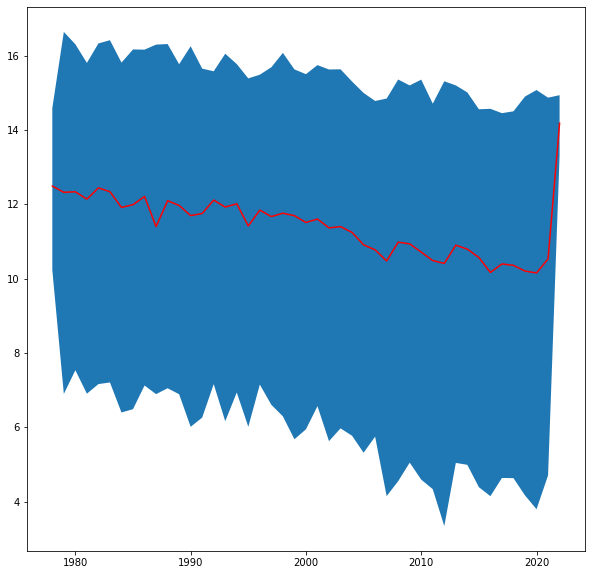

In [301]:
plt.rc('figure', figsize=(10, 10))
plt.fill_between(YDF.Year, YDF.Min, YDF.Max)
plt.plot(YDF.Year,YDF.Avg, 'r')

plot 2 Box plot 1980

In [302]:
dfMonths = pd.DataFrame(columns = ['Months','Average'])

In [303]:
dfMonths["Average"] = [df[df["Month"]==month].Extent.mean() for month in range(1,13)]
dfMonths["Months"] = [month for month in range(1,13)]

<StemContainer object of 3 artists>

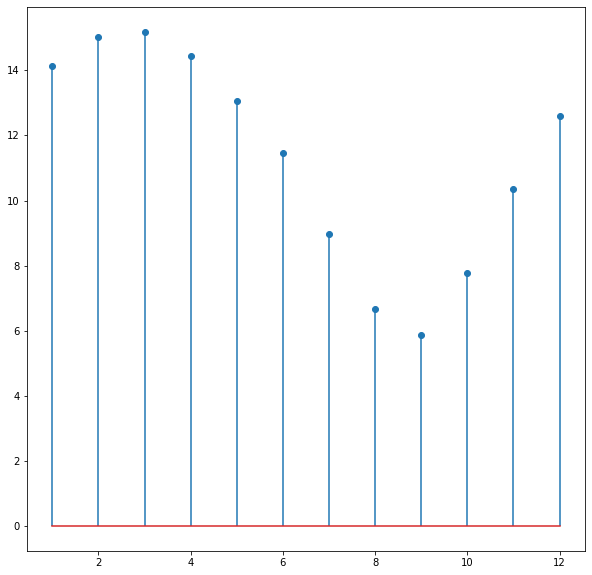

In [313]:
plt.stem(dfMonths.Months, dfMonths.Average)

In [304]:
dfMonths

,Months,Average
0,1,14.137465
1,2,15.009457
2,3,15.179502
3,4,14.441244
4,5,13.043770
5,6,11.449558
6,7,8.969325
7,8,6.668013
8,9,5.870635
9,10,7.779023


,Months,Average
0,1,14.137465
1,2,15.009457
2,3,15.179502
3,4,14.441244
4,5,13.043770
5,6,11.449558
6,7,8.969325
7,8,6.668013
8,9,5.870635
9,10,7.779023


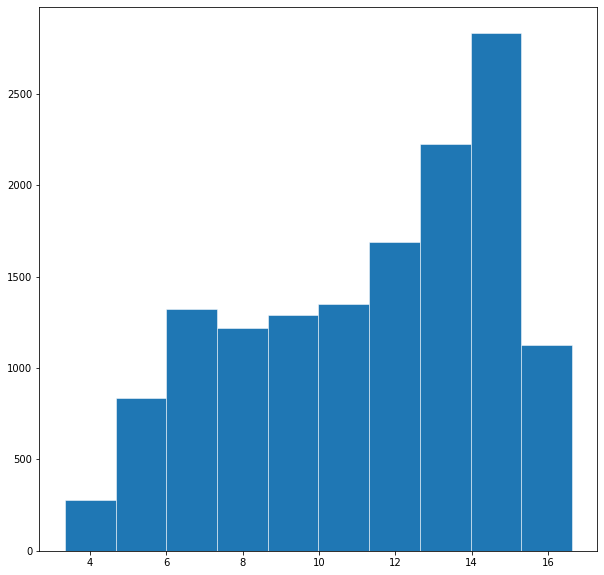

In [312]:
plt.rc('figure', figsize=(10, 10))
plt.hist(df.Extent, linewidth=0.5, edgecolor="white")
dfMonths